# 1. Title analysis - carlicas.com/blog

In [2]:
import pandas as pd
import json
import datetime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import re
import statistics
import numpy as np

In [3]:
all_posts = pd.read_json("carlicas_posts.json")

In [4]:
all_posts.head(4)

,title,date,url
0,LOS 20 PASOS PARA LANZAR UNA WEB PROFESIONAL ...,"julio 15, 2020",https://carlicas.com/como-lanzar-una-pagina-web/
1,"DE CERO A $100,000.00 DÓLARES AL MES GRACIAS ...","julio 13, 2020",https://carlicas.com/cien-mil-dolares-trabajan...
2,CÓMO GANAR DINERO ONLINE CON UNA PÁGINA WEB,"julio 13, 2020",https://carlicas.com/como-ganar-dinero-con-una...
3,CÓMO CREAR UN BLOG PROFESIONAL Y GANAR MILES ...,"julio 3, 2020",https://carlicas.com/como-crear-un-blog/


In [5]:
#convert date column data into datetime object
for i, row in all_posts.iterrows():
    month = row["date"].split()
    if month[0] == "enero":
        eng_month = "jan "
    elif month[0] == "febrero":
        eng_month = "feb "
    elif month[0] == "marzo":
        eng_month = "mar "
    elif month[0] == "abril":
        eng_month = "apr "
    elif month[0] == "mayo":
        eng_month = "may "
    elif month[0] == "junio":
        eng_month = "jun "
    elif month[0] == "julio":
        eng_month = "jul "
    elif month[0] == "agosto":
        eng_month = "aug "
    elif month[0] == "septiembre":
        eng_month = "sep "
    elif month[0] == "octubre":
        eng_month = "oct "
    elif month[0] == "noviembre":
        eng_month = "nov "
    else:
        eng_month = "dec "
            
    f_month = eng_month + " ".join(month[1:3])
    date_obj = datetime.datetime.strptime(f_month, "%b %d, %Y")
    row["date"] = date_obj.date()

In [6]:
#iterate through all the titles and count every word
keywords = {}

for title in all_posts["title"]:
    title_analysis = title.lower().split()
    for word in title_analysis:
        if len(word) > 4:
            if word in keywords:
                keywords[word] += 1
            else:
                keywords[word] = 1
                
#from your keywords dict, filter those repeated more than 4
most_used_kw = []
for key, value in keywords.items():
    if value > 4:
        most_used_kw.append(key)

#one more time, iterate through all the titles and filter them if they contain at least one of the most used kw
titles_w_kw = []

for title in all_posts["title"]:
    for kw in most_used_kw:
        if kw in title.lower().split():
            if title.lower() in titles_w_kw:
                pass
            else:
                titles_w_kw.append(title.lower())

In [7]:
#create new columns for month, year and day, separated
for i, row in all_posts.iterrows():
    all_posts.at[i, "month"] = row["date"].month
    all_posts.at[i, "day"] = row["date"].day
    all_posts.at[i, "year"] = int(row["date"].year)

Good guide for __datetime formating__: https://stackabuse.com/converting-strings-to-datetime-in-python/

In [8]:
#group posts data frame by year and month
post_per_month =all_posts.groupby(["year", "month"])["title"].count()

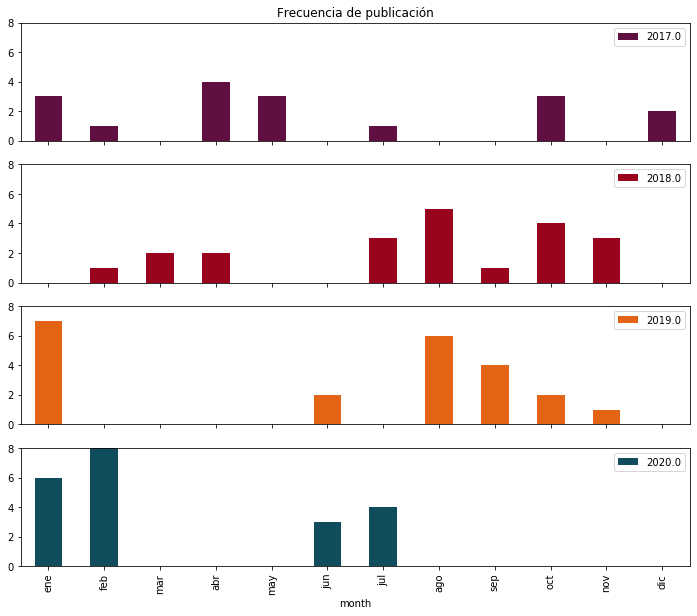

In [9]:
#first try
fig= post_per_month.unstack(level=0).plot(kind='bar',
                                     subplots=True,
                                     sharey=True,
                                     figsize=(12,10),
                                     legend=True,
                                     layout=(4,1),
                                     title=["Frecuencia de publicación", "", "", ""],
                                    color=["#5F0F40", "#9A031E", "#E36414", "#0F4C5C"],
                                    grid=False,
                                    ylim=(0,8))
 
plt.xticks(range(12), ["ene", "feb", "mar", "abr", "may", "jun", "jul", "ago", "sep", "oct", "nov", "dic"]);

In [10]:
post_per_month.unstack(level=0)[2017] #data
post_per_month.unstack(level=0)[2017].index #labels

Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0], dtype='float64', name='month')

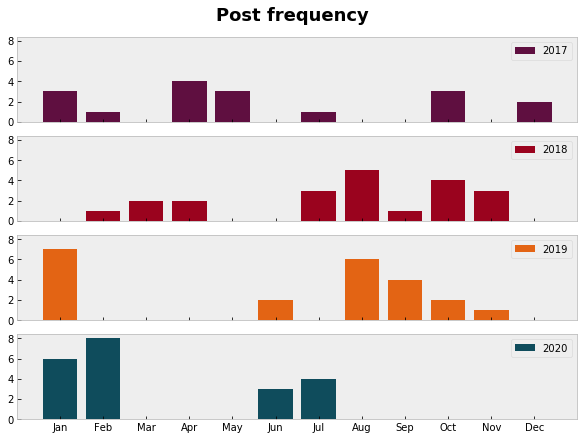

In [12]:
#final plot
plt.style.use("bmh")
fig_kw = {"figsize":(8,6)}
fig4, f4_axes = plt.subplots(ncols=1, nrows=4, constrained_layout=True, sharex=True, sharey=True, **fig_kw)
fig4.suptitle('Post frequency', fontsize=18, fontweight='bold')
plt.yticks(np.arange(0,10,2))
plt.xticks(np.arange(1,13,1),["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])


years = [2017, 2018, 2019, 2020]
color=["#5F0F40", "#9A031E", "#E36414", "#0F4C5C"]
i=0
for year in years:
    f4_axes[i].bar(post_per_month.unstack(level=0)[year].index, post_per_month.unstack(level=0)[year], color=color[i],
                  label=str(year))
    f4_axes[i].legend(loc="upper right")
    f4_axes[i].grid(False)
    i+=1
    
#plt.savefig("post_frequency.png", dpi=120)

subplots doc https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

customizing subplots: https://stackoverflow.com/questions/19626530/python-xticks-in-subplots

plotting layout: https://stackoverflow.com/questions/51111762/customizing-subplots-in-matplotlib/51112360

https://matplotlib.org/3.3.1/tutorials/intermediate/gridspec.html

this has something related to disober robots.txt... https://medium.com/@ProxiesAPI.com/scraping-blog-posts-with-scrapy-4df42c8498d0

proxis api https://www.proxiesapi.com/

https://matplotlib.org/tutorials/text/text_intro.html

https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.gca.html

https://stackoverflow.com/questions/27474764/changing-fontsize-in-python-subplots

https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib

# 2. Article analysis

In [13]:
with open("carlicas_articles.json") as json_file:
    articles = json.load(json_file)

# version 1.5

In [14]:
articles_data = {"Title": [], "Keyword": [], "Kw count": [], "Article lenght (words)" : [], "Reading time (180w/min)" : [],
                "Kw density (%)": []}

for article in articles:
    total_article_lenght = 0
    for tag, text in article.items():
        for snipet in text:
            total_article_lenght += len(snipet.split())
    print("\n total article lenght in words >>>", total_article_lenght)
    
    reading_time = datetime.time(0, int(total_article_lenght / 180))
    print("estimated reading time >>>", reading_time)
            
    
    #1. get <h1> and filter all words that might be a potential keyword
    title = article["h1"][0].lower()
    print("<<<title>>>", title)
    title_words = []
    
    drop_words = ["el", "la", "los", "las", "al", "en", "un", "uno", "una", "unos", "unas", "para", "con", "por", "¿por",
                  "de", "a", "mi", "mis", "y", "o", "tu", "del", "que", "qué", "su", "sus"]
    for word in title.split():
        if "+" in word or "$" in word:
            pass
        else:
            if word in drop_words:
                pass
            else:
                title_words.append(word)
#     print(title_words)
    for index,word in enumerate(title_words):
        if word[-1] in [",", ".", ";", ":", "?"]:
            title_words[index] = word[:-1]
    
    #2. for every potential keyword filtered from title, look for it on every piece of text extracted from the article
    all_pot_kw_extractions = {}
    for potential_kw in title_words:
        print("\n ..--POTENTIAL KW--..", potential_kw)
        pot_kw_extractions = []
        for tag, text in article.items():
#             print(tag)
            for snipet in text:
#                 print("<<<snipet>>>", snipet.lower())
                word_extraction = re.findall("([^ ]+ [^ ]+ "+potential_kw+" [^ ]+ [^ ]+)|([^ ]+ "+potential_kw+
                                             " [^ ]+)|("+potential_kw+" [^ ]+ [^ ]+)|([^ ]+ [^ ]+ "+potential_kw+
                                             "$)|([^ ]+ [^ ]+ "+potential_kw+"\b)|([^ ]+ [^ ]+ "+potential_kw+
                                             ",{1})|([^ ]+ [^ ]+ "+potential_kw+"\.{1})|([^ ]+ [^ ]+ "+potential_kw+
                                             "\;{1})",snipet.lower())
#                 print("<<<raw extraction>>>", word_extraction)
                if word_extraction == []:
                    pass
                else:
                    for raw_extraction in word_extraction:
                        for extraction in raw_extraction:
                            if extraction == "":
                                pass
                            else: 
                                pot_kw_extractions.append(extraction)
#                                 print("<<<actual extraction>>>", extraction)
#         print("potential keyword >>", potential_kw)
#         print("<<<total kw extractions>>", len(pot_kw_extractions))
#         print("<<<kw extractions>>>", pot_kw_extractions)
        all_pot_kw_extractions[potential_kw] = pot_kw_extractions
#     print("all", all_pot_kw_extractions)
#     print("---------")
    #3.Once we have the extractions for every word filtered from title, let's filter the ONE with the highest number of extractions
    keyword_vol = max([len(extraction) for extraction in all_pot_kw_extractions.values()])
    dropp_words = ["el", "la", "los", "las", "al", "en", "un", "uno", "una", "unos", "unas", "para", "con", "por",
                   "¿por", "de", "a", "mi", "mis", "y", "o", "tu", "del", "que", "qué", "su", "sus"]
    words_count = {}
    for keyword, extractions in all_pot_kw_extractions.items():
        if len(extractions) == keyword_vol: #filtering all words to only the one wiht the highest number of extractions
            print("<<<kw most repeated>>>", keyword)
            print(extractions)
    #4.From the extractions of the most repeated keyword, split each extraction, evaluate every word and count again to find
    #"company words" along with the main keyword
            for extraction in extractions:
                for word in extraction.split():
                    if word in dropp_words:
                        pass
                    else:
                        punctuation = [",", ".", ";", ":", "?"]
                        if list(word)[-1] in punctuation:
                            if word[:-1] in words_count:
                                words_count[word[:-1]] += 1
                            else:
                                words_count[word[:-1]] = 1
                        else:
                            if word in words_count:
                                words_count[word] += 1
                            else:
                                words_count[word] = 1
    print("word counts >>>", words_count)
    #5. From all the words counted from the extractions, get all the counts, sort it and filter only the top2 (kw + company
    #word) or if case, top3 (kw + 2 company words)
    top_counts = []
    for word, count in words_count.items():
        top_counts.append(count)
    top_counts.sort(reverse=True)
    print("top counts >>>", top_counts)
    final_kw_components = []
    if top_counts[1] == top_counts[2]:
        top = top_counts[:3]
        for word, count in words_count.items():
            if count in top:
                final_kw_components.append(word)
    else:
        top = top_counts[:2]
        for word, count in words_count.items():
            if count in top:
                final_kw_components.append(word)
    print("final parts >>>", final_kw_components)
    #6. Create combinations of the kw with the company words like kw + cw / cw + kw / kw + cw + cw / cw + kw + cw...
    #and look those combinations in the extractions previosuly got to finally decide which is the KW positioned in the article
    highest_count = max(words_count.values())
    kw_highest_c = list(words_count.keys())[list(words_count.values()).index(highest_count)]
#     print(highest_count)
#     print(kw_highest_c)
#     print(all_pot_kw_extractions[kw_highest_c])
    
    kw_shortlist = {}
    kw_options = []
    if len(final_kw_components) == 2:
        kw_option_one = final_kw_components[0]+" "+final_kw_components[1]
        kw_option_two = final_kw_components[1]+" "+final_kw_components[0]
        kw_options.append(kw_option_one)
        kw_options.append(kw_option_two)
        
    else:
        kw_option_one = final_kw_components[0]+" "+final_kw_components[1]
        kw_option_two = final_kw_components[0]+" "+final_kw_components[2]
        kw_option_three = final_kw_components[1]+" "+final_kw_components[0]
        kw_option_four = final_kw_components[2]+" "+final_kw_components[0]
        kw_option_five = final_kw_components[0]+" "+final_kw_components[1]+" "+final_kw_components[2]
        kw_option_six = final_kw_components[0]+" "+final_kw_components[2]+" "+final_kw_components[1]
        kw_option_seven = final_kw_components[1]+" "+final_kw_components[0]+" "+final_kw_components[2]
        kw_option_eight = final_kw_components[2]+" "+final_kw_components[0]+" "+final_kw_components[1]
        kw_options.append(kw_option_one)
        kw_options.append(kw_option_two)
        kw_options.append(kw_option_three)
        kw_options.append(kw_option_four)
        kw_options.append(kw_option_five)
        kw_options.append(kw_option_six)
        kw_options.append(kw_option_seven)
        kw_options.append(kw_option_eight)
        
        
    for extraction in all_pot_kw_extractions[kw_highest_c]:
        for kw in kw_options:
#           print(kw)
            if re.findall(kw, extraction):
                if kw in kw_shortlist:
                    kw_shortlist[kw] += 1
#                   print("shortlist>>>",kw_shortlist)
                else:
                    kw_shortlist[kw] = 1
#                   print("shortlist>>>", kw_shortlist)
    print("kw shortlist results >>>", kw_shortlist)
    
    #7. Calculate the final keyword article estimated, keyword ocurrencies and keyword density
    try:
        article_kw = list(kw_shortlist.keys())[list(kw_shortlist.values()).index(max(kw_shortlist.values()))]
        if max(kw_shortlist.values()) == top_counts[1]:
            kw_counting = max(kw_shortlist.values())
        else:
            kw_counting = top_counts[1]
        
    except:
        article_kw = " ".join(final_kw_components)
        kw_counting = top_counts[1]
            
    kw_density = round(kw_counting / total_article_lenght, 3) * 100

#       print("kw density >>>", kw_density)
    
    #7.Add all data to "articles_data" dictionary for further conversion to Dataframe
    articles_data["Title"].append(title)
    articles_data["Keyword"].append(article_kw)
    articles_data["Kw count"].append(kw_counting)
    articles_data["Article lenght (words)"].append(total_article_lenght)
    articles_data["Reading time (180w/min)"].append(reading_time)
    articles_data["Kw density (%)"].append(kw_density)
    


 total article lenght in words >>> 4080
estimated reading time >>> 00:22:00
<<<title>>> los 20 pasos para lanzar una web profesional con el pie derecho

 ..--POTENTIAL KW--.. 20

 ..--POTENTIAL KW--.. pasos

 ..--POTENTIAL KW--.. lanzar

 ..--POTENTIAL KW--.. web

 ..--POTENTIAL KW--.. profesional

 ..--POTENTIAL KW--.. pie

 ..--POTENTIAL KW--.. derecho
<<<kw most repeated>>> web
['lanzar una web profesional con', 'tu página web – el', 'crea tu web – los', 'tu sitio web', 'para tu web', 'tu página web', 'prepara tu web para el', 'una página web con el', 'o página web (uno de', 'mis páginas web.', 'tu página web,', 'en tu web un certificado', 'tu sitio web.', 'tu página web.', 'tu página web,', 'una página web la ley', 'tu página web,', 'tu página web,', 'a tu web sin necesidad', 'bancarias, página web,', 'de tu web (el enlace', 'tu página web (permalinks) a', 'si tu web estará basada', 'de tu web y cómo', 'tu proyecto web.', 'mis páginas web,', 'tu proyecto web facture lo', 'lances t


 ..--POTENTIAL KW--.. tiempos

 ..--POTENTIAL KW--.. difíciles
<<<kw most repeated>>> trabajo
['cómo encontrar trabajo en tiempos', 'trabajo en poco', 'trabajo es duro…', 'buscar un trabajo es en', 'mismo, un trabajo de tiempo', 'de trabajo sólida.', 'quieres su trabajo y el', 'tratar de\nencontrar trabajo deberás aprender', 'en encontrar trabajo,', 'para encontrar trabajo.', 'de encontrar trabajo,', 'el mismo trabajo para un', 'encontrar el trabajo que realmente', 'bolsa de trabajo,', 'encontrar tu trabajo ideal, es', 'de tu trabajo perfecto son', 'encontrar un trabajo que no', 'ofertas de trabajo.', 'tu trabajo ideal.', 'puesto de trabajo al que', 'solicitud de trabajo,', '\xa0realizando el trabajo al que', 'encontrar trabajo a', 'a mi trabajo para dedicarme']
word counts >>> {'cómo': 1, 'encontrar': 9, 'trabajo': 24, 'tiempos': 1, 'poco': 1, 'es': 3, 'duro…': 1, 'buscar': 1, 'mismo': 2, 'tiempo': 1, 'sólida': 1, 'quieres': 1, 'tratar': 1, 'deberás': 1, 'aprender': 1, 'realmente': 1


 ..--POTENTIAL KW--.. 100

 ..--POTENTIAL KW--.. lugares

 ..--POTENTIAL KW--.. turísticos

 ..--POTENTIAL KW--.. méxico
<<<kw most repeated>>> méxico
['turísticos de méxico', 'turísticos de méxico', 'si méxico se', 'turísticos de méxico que deberías', 'ciudad de méxico,', 'ciudad de méxico.', 'ubicadas en\ndzitnup, méxico.', 'ciudad de méxico y cuenta\ncon', 'ciudad de méxico.', 'ciudad de méxico.', 'ciudad de méxico y es', 'en xilitla, méxico.', 'ciudad de méxico.', 'ciudad de méxico y que', 'tropical de méxico.', 'cancún – méxico.', 'en\naguascalientes – méxico,', 'ciudad de méxico.', 'ciudad de méxico.', 'de naica\n– méxico.', 'chiapas – méxico.', 'en naucalpán\n– méxico.', 'luis potosí\n– méxico.', 'michoacán – méxico.', 'ciudad de méxico.', 'en xochicalco, méxico.', 'en guanajuato, méxico.', 'zaragoza – méxico.', 'ciudad de méxico.', 'ciudad de méxico,', 'ciudad de méxico.', 'ciudad de méxico.', 'soto – méxico.', 'en teuchitlán\n– méxico.', 'ciudad de méxico.', 'ciudad de méxico


 ..--POTENTIAL KW--.. extra

 ..--POTENTIAL KW--.. sin

 ..--POTENTIAL KW--.. renunciar

 ..--POTENTIAL KW--.. trabajo
<<<kw most repeated>>> dinero
['de ganar dinero extra sin', 'ganar dinero sólo\nes', 'ganar dinero extra', 'ganar dinero extra', 'dinero extra por', 'ganar dinero extra?', '1. gana dinero extra poniendo', '2. gana dinero con los', '7. gana dinero como repartidor', '9. gana dinero extra con', '12. gana dinero cocinando para', '7. gana dinero extra con', '7. gana dinero extra vendiendo', 'que ganar dinero extra es', 'de ganar dinero extra mientras\xa0', 'para ganar dinero extra que', 'para ganar dinero.', 'prefieres ganar dinero extra con', 'pero el dinero que ganas', 'cómo ganar dinero extra después', 'sea mucho dinero,', 'y ganar dinero extra sin', 'puedes hacer dinero extra de', 'y ganar dinero extra ayudando', 'quieres ganar dinero extra y\ndecidir', 'algo de dinero extra\nentregando alimentos,', 'de ganar dinero extra y', 'pero\nnecesitan el dinero,', 'podrías gana


 ..--POTENTIAL KW--.. visitar

 ..--POTENTIAL KW--.. 2020
<<<kw most repeated>>> colombia
['turísticos de colombia para visitar', 'turísticos de colombia', 'turísticos de colombia para ayudarte', 'rosado de colombia.', 'turísticos de colombia.', 'turísticos de colombia que no', 'turísticos de colombia menos conocidos,', 'turísticos de colombia más visitados', 'cañón de colombia,', 'turísticos de colombia que no', 'turísticos de colombia si lo', 'cristalino de colombia,', 'turísticos de colombia,', 'finas de colombia y las', 'quindío en colombia,', 'santa marta, colombia.', 'en guapi, colombia.', 'en barranquilla, colombia.', 'turísticos de colombia es la', 'en popayán, colombia,', 'del huila, colombia.', 'vista hermosa, colombia.', 'en nariño, colombia.', 'norte de colombia,', 'turísticos de colombia.', 'en villacencio, colombia,', 'turísticos de colombia más visitados,', 'del tequendama, colombia.', 'en medellín, colombia.', 'en medellín, colombia.', 'antioquia – colombia.', 'observa


 ..--POTENTIAL KW--.. canadá

 ..--POTENTIAL KW--.. –

 ..--POTENTIAL KW--.. costos

 ..--POTENTIAL KW--.. becas

 ..--POTENTIAL KW--.. requisitos

 ..--POTENTIAL KW--.. 2020
<<<kw most repeated>>> canadá
['estudiar en canadá – costos,', 'estudiar en canadá', 'estudiar en canadá', 'estudiar en canadá', 'estudiar en canadá', 'estudiar en canadá', 'vivir en canadá', 'estudiar en canadá', 'estudiar en canadá', 'estudiar en canadá', 'canadá es una', 'obtenido en canadá también será', 'doctorado en canadá te\nbrindará una', 'estudiar en canadá,', 'estudiar en canadá.', 'en canadá definitivamente).', 'gobierno de canadá.', 'estudiar en canadá.', 'canadá te da', 'trabajar en canadá después de', 'canadá es el', 'estudiar en canadá es bastante', 'universidades públicas canadá ofrece colegiaturas', 'estudiar en canadá,', 'vida en canadá es mucho', 'el contrario, canadá ocupa el', 'caros en canadá,', 'estudiar en canadá,', 'licenciaturas en canadá.', 'york en canadá,', 'canadá tiene dos\nidiomas


 ..--POTENTIAL KW--.. futuro
<<<kw most repeated>>> carreras
['de las carreras universitarias con', 'algunas carreras universitarias.', 'adicionalmente, algunas carreras universitarias específicas', 'opciones de carreras universitarias en', 'de las carreras universitarias de', 'carreras universitarias –', 'carreras universitarias del', 'de las carreras universitarias más', 'todas aquellas carreras universitarias que', 'que las carreras universitarias especializadas', 'tanto las carreras universitarias de', 'cursos y carreras virtuales en', 'las mejores carreras universitarias del', 'de las carreras universitarias mejor', 'de las carreras universitarias que', 'si eliges carreras universitarias como', 'optar por carreras universitarias en']
word counts >>> {'carreras': 17, 'universitarias': 16, 'algunas': 2, 'adicionalmente': 1, 'específicas': 1, 'opciones': 1, '–': 1, 'más': 1, 'todas': 1, 'aquellas': 1, 'especializadas': 1, 'tanto': 1, 'cursos': 1, 'virtuales': 1, 'mejores': 1, 'mejor

kw shortlist results >>> {}

 total article lenght in words >>> 2052
estimated reading time >>> 00:11:00
<<<title>>> 20 de las mejores licenciaturas en línea de latinoamérica

 ..--POTENTIAL KW--.. 20

 ..--POTENTIAL KW--.. mejores

 ..--POTENTIAL KW--.. licenciaturas

 ..--POTENTIAL KW--.. línea

 ..--POTENTIAL KW--.. latinoamérica
<<<kw most repeated>>> línea
['licenciaturas en línea de latinoamérica', 'licenciatura en línea es legítimo?', 'licenciatura en línea vs\nlicenciatura a', 'las\nlicenciaturas en línea', 'licenciaturas en línea', 'licenciaturas en línea – méxico', 'licenciaturas en línea – colombia', 'licenciaturas en línea – argentina', 'licenciaturas en línea – panamá', 'licenciaturas en línea existen, ni', 'licenciaturas en línea,', 'licenciatura en línea es la', 'licenciatura en línea,', 'licenciatura en línea.', 'en línea legítima:', 'licenciaturas en línea (como sugiere', 'licenciaturas en línea.', 'licenciatura en línea,', 'licenciatura en línea es muy', 'licenciatura


 ..--POTENTIAL KW--.. 2020
<<<kw most repeated>>> cursos
['los mejores cursos en línea', 'de los cursos en línea', 'cursos gratis de', 'cursos online gratis', '100 cursos en', 'cursos online gratis', 'cursos online de', 'cursos online de', 'cursos gratis de', 'cursos gratis de', 'cursos gratis de', 'cursos en línea', 'cursos online de', 'cursos online de', 'cursos en línea', 'cursos online de\nestrategias', 'cursos en línea', 'cursos online de', 'cursos en línea', 'cursos online de', 'cursos en línea', 'cursos online de', 'miles de cursos online gratis', 'para tomar cursos regulares, como', 'que los cursos en línea', 'número de cursos en línea,', 'estos cursos en', 'courses o cursos en línea', 'los mejores cursos en línea', 'los mejores cursos online para', 'los mejores cursos online gratuitos', 'los mejores cursos online gratuitos', 'selección de cursos de elearning', 'de los cursos online más', 'los cursos gratis', 'con estos cursos gratuitos que', 'de los cursos en línea', 'mayoría


 ..--POTENTIAL KW--.. este

 ..--POTENTIAL KW--.. 2020
<<<kw most repeated>>> internet
['trabajos por internet para este', 'trabajo por internet', 'a\ntrabajar por internet', 'internet por cuenta', 'trabaja por internet como asistente', 'encuestas por internet', 'ofrecen\ntrabajos por internet', 'trabajos por internet que dicen', 'trabajos por internet sí dan', 'por internet y\xa0', 'trabajos por internet,', 'través de internet (leyendo), por', 'en todo internet y empecé', 'dinero por internet,', 'dinero por internet y uno', 'trabajar por internet es ofreciendo', 'vivimos del internet,', 'trabajos por internet,', 'generar\ningresos por internet.', 'trabajo por internet ideal para', 'calidad en internet.', 'internet te dará', 'conexión a internet y crear', 'internet más populares.', 'trabajo por internet con el\nque', 'internet más populares', 'trabajos por internet más fáciles', 'dinero por internet con encuestas', 'conexión a internet,', 'conexión a internet puede hacer.', 'encontrar


 ..--POTENTIAL KW--.. personal

 ..--POTENTIAL KW--.. pueden

 ..--POTENTIAL KW--.. cambiar

 ..--POTENTIAL KW--.. vida
<<<kw most repeated>>> vida
['cambiar tu vida', 'cambia tu vida en 365', 'en la vida como tu\nescuela', 'a mi vida actual y', 'ganarte la vida viviendo solo', 'en tu vida un evento', 'llevaba nuestra vida,', 'en tu vida,', 'cambia la vida,', 'para tu vida pueden ser', 'de tu vida cuanto antes.', 'de tu vida.', 'sientes que\ntu vida está en', 'de tu vida,', 'a nuestra vida,', 'en la vida.', 'cambiar tu vida en los', 'en la vida “el apuro', 'proyecto de vida', 'con tu vida', 'propósito de vida', 'proyecto de vida', 'proyecto de vida']
word counts >>> {'cambiar': 2, 'vida': 23, 'cambia': 2, '365': 1, 'como': 1, 'escuela': 1, 'actual': 1, 'ganarte': 1, 'viviendo': 1, 'solo': 1, 'evento': 1, 'llevaba': 1, 'nuestra': 2, 'pueden': 1, 'ser': 1, 'cuanto': 1, 'antes': 1, 'sientes': 1, 'está': 1, '“el': 1, 'apuro': 1, 'proyecto': 3, 'propósito': 1}
top counts >>> [23, 3, 2, 2, 


 ..--POTENTIAL KW--.. 20

 ..--POTENTIAL KW--.. formas

 ..--POTENTIAL KW--.. ganar

 ..--POTENTIAL KW--.. dinero

 ..--POTENTIAL KW--.. internet

 ..--POTENTIAL KW--.. 2020
<<<kw most repeated>>> dinero
['de ganar dinero por internet', '¿cómo ganar dinero desde casa', 'ganar dinero online', 'de ganar dinero por internet', '¿ganar dinero por', 'de ganar dinero por internet', 'cómo ganar dinero en internet\nofreciendo', 'de ganar dinero en\ndesde casa\xa0', 'gana dinero en', 'ganar dinero online', 'ganar dinero en', 'haz dinero vendiendo', 'ganar dinero online?', 'gana dinero en', 'gana dinero por', 'gana dinero online', 'gana dinero desde', 'gana dinero online', 'gana dinero dando', 'gana dinero como', 'gana dinero como', 'gana dinero creando', 'mientras gana dinero trabajando desde', 'sí..!! ganar dinero por internet', 'mientras gano dinero desde cualquier', 'a ganar dinero por internet,', 'de ganar dinero online, están', 'a ganar dinero por internet,', 'puedes ganar dinero online, h


 ..--POTENTIAL KW--.. cuenta
<<<kw most repeated>>> te
['nadie te cuenta', 'seguramente\nse te vendrán', 'te cifras como', 'te que estás', 'te revelo el', 'te del sofá,', 'te tu contenido', 'en promedio te dará unos', 'te en el', 'te trabajo carlicas.']
word counts >>> {'nadie': 1, 'te': 10, 'cuenta': 1, 'seguramente': 1, 'se': 1, 'vendrán': 1, 'cifras': 1, 'como': 1, 'estás': 1, 'revelo': 1, 'sofá': 1, 'contenido': 1, 'promedio': 1, 'dará': 1, 'trabajo': 1, 'carlicas': 1}
top counts >>> [10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
final parts >>> ['nadie', 'te', 'cuenta', 'seguramente', 'se', 'vendrán', 'cifras', 'como', 'estás', 'revelo', 'sofá', 'contenido', 'promedio', 'dará', 'trabajo', 'carlicas']
kw shortlist results >>> {'nadie te': 1, 'nadie te cuenta': 1}

 total article lenght in words >>> 1987
estimated reading time >>> 00:11:00
<<<title>>> 25 características de un emprendedor exitoso

 ..--POTENTIAL KW--.. 25

 ..--POTENTIAL KW--.. características

 ..--POTENTIAL KW-


 ..--POTENTIAL KW--.. gente

 ..--POTENTIAL KW--.. odia

 ..--POTENTIAL KW--.. trabajo

 ..--POTENTIAL KW--.. pero

 ..--POTENTIAL KW--.. no

 ..--POTENTIAL KW--.. hace

 ..--POTENTIAL KW--.. nada

 ..--POTENTIAL KW--.. cambiarlo…
<<<kw most repeated>>> no
['trabajo, pero no hace nada', 'emprender no es', 'intentar\nun día, no funcionó y', 'estuve allí, no me limité', 'no que tomé', 'almuerzo, definitivamente no es para', 'todo porque no me permiten', 'ojo, no todos', 'pero si no,', 'aunque hoy no tengas casi', 'pero eso no podía estar', 'pero esta no tiene derecho', 'por qué? no porque no', 'ganas y/o\ntalento, no porque no', 'no lo lograrán', 'hago, pero no dejar de', 'las que no podré hacer', 'ejecuta y no sólo se', 'manera, cuando no,', 'y como no era una\nbuena', 'nuestro proyecto, no estamos hechos', 'sus avances, no estamos hechos', 'por moda, no estamos hechos', 'y rápido, no estamos\nhechos para', 'la toalla,\ndefinitivamente no estamos hechos']
word counts >>> {'trabajo': 1,

In [15]:
table = pd.DataFrame.from_dict(articles_data)

In [16]:
table.head(20)

,Title,Keyword,Kw count,Article lenght (words),Reading time (180w/min),Kw density (%)
0,los 20 pasos para lanzar una web profesional c...,página web,26,4080,00:22:00,0.6
1,cómo crear blog profesional y ganar miles por ...,crear blog,15,7419,00:41:00,0.2
2,top cursos gratis de la unam,cursos individuales,3,1011,00:05:00,0.3
3,cómo ganar dinero online con una página web,página web,16,1891,00:10:00,0.8
4,cómo encontrar trabajo en tiempos difíciles,encontrar trabajo,9,1628,00:09:00,0.6
5,guía para emigrar a españa sin ser español,emigrar españa,8,1949,00:10:00,0.4
6,"de cero a $100,000.00 dólares al mes gracias a...",página web,12,2108,00:11:00,0.6
7,top cursos gratis de la universidad de chile,cursos gratis,3,1032,00:05:00,0.3
8,los destinos de viaje más baratos del mundo – ...,más baratos,21,1116,00:06:00,1.9
9,top cursos gratis del tec de monterrey,cursos gratis,4,1007,00:05:00,0.4


In [17]:
table.describe()

,Kw count,Article lenght (words),Kw density (%)
count,81.000000,81.000000,81.000000
mean,13.234568,2470.061728,0.535802
std,15.297280,1734.731214,0.471516
min,1.000000,553.000000,0.000000
25%,3.000000,1390.000000,0.200000
50%,6.000000,1949.000000,0.400000
75%,16.000000,2864.000000,0.700000
max,69.000000,10220.000000,2.300000


In [21]:
#calculate iqr for filtering outliers
firstq, secondq, thirdq = table["Article lenght (words)"].quantile([0.25, 0.5, .75])

iqr = thirdq - firstq

lowerb = firstq - 1.5 * iqr
upperb = thirdq + 1.5 * iqr

In [22]:
art_len_data = []
for i, row in table.iterrows():
    if row["Article lenght (words)"] < lowerb or row["Article lenght (words)"] > upperb:
        pass
    else:
        art_len_data.append(i)

In [23]:
non_outliers = table.iloc[art_len_data]

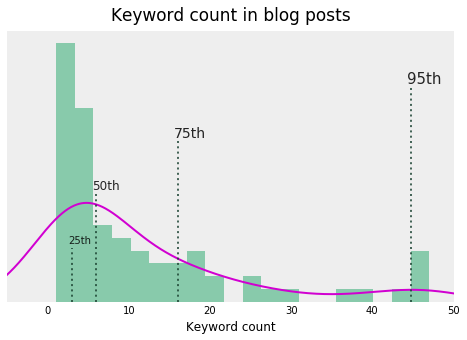

In [24]:
plt.style.use("bmh")
fig, ax = plt.subplots(figsize = (8,5))

#plots
non_outliers["Kw count"].plot(kind="hist", density=True, alpha=0.65, bins=20, color="#52B788")
non_outliers["Kw count"].plot(kind="kde", color="#D100D1")
#quantile lines
q25, q50, q75, q95 = non_outliers["Kw count"].quantile([0.25, 0.5, 0.75, 0.95])
quantiles = [[q25, 0.8, 0.2], [q50, 0.8, 0.4], [q75, 0.8, 0.6], [q95, 0.8, 0.8]]
for i in quantiles:
    ax.axvline(i[0], alpha=i[1], ymax=i[2], linestyle=":", color="#1B4332")
    
ax.text(q25-0.5, 0.027, "25th", size = 10, alpha = 0.85)
ax.text(q50-0.5, 0.052, "50th", size = 12, alpha = 0.85)
ax.text(q75-0.5, 0.0761, "75th", size = 14, alpha = 0.85)
ax.text(q95-0.5, 0.101, "95th", size = 15, alpha = 0.85)
#x axis
ax.set_xlabel("Keyword count")
ax.set_xlim(-5,50)
#y axis
#ax.set_ylim(0,.12)
ax.set_yticks([]) #remove y ticks
ax.set_ylabel("")
#overall
ax.grid(False) #removes the grid added by the "bmh" style
ax.set_title("Keyword count in blog posts", size=17, pad=10)
ax.tick_params(left=False, bottom=False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)

plt.savefig("kw_count.png", dpi=120, transparent=True)
plt.show()

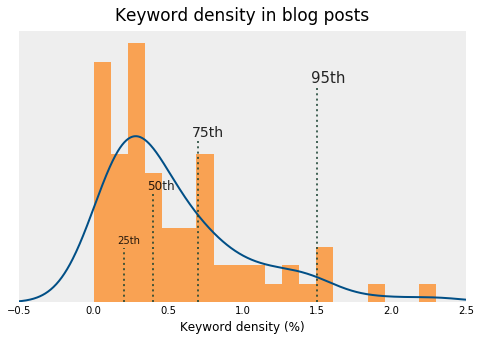

In [25]:
fig, ax = plt.subplots(figsize = (8,5))

#plots
non_outliers["Kw density (%)"].plot(kind="hist", density=True, alpha=0.65, bins=20, color="#FF7900")
non_outliers["Kw density (%)"].plot(kind="kde", color="#014F86")
#quantile lines
q25, q50, q75, q95 = non_outliers["Kw density (%)"].quantile([0.25, 0.5, 0.75, 0.95])
quantiles = [[q25, 0.8, 0.2], [q50, 0.8, 0.4], [q75, 0.8, 0.6], [q95, 0.8, 0.8]]
for i in quantiles:
    ax.axvline(i[0], alpha=i[1], ymax=i[2], linestyle=":", color="#1B4332")
    
ax.text(q25-0.04, .38, "25th", size = 10, alpha = 0.85)
ax.text(q50-0.04, 0.73, "50th", size = 12, alpha = 0.85)
ax.text(q75-0.04, 1.07, "75th", size = 14, alpha = 0.85)
ax.text(q95-0.04, 1.42, "95th", size = 15, alpha = 0.85)
#x axis
ax.set_xlabel("Keyword density (%)")
ax.set_xlim(-0.5,2.5)
#y axis
#ax.set_ylim(0,.12)
ax.set_yticks([]) #remove y ticks
ax.set_ylabel("")
#overall
ax.grid(False) #removes the grid added by the "bmh" style
ax.set_title("Keyword density in blog posts", size=17, pad=10)
ax.tick_params(left=False, bottom=False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)

plt.savefig("kw_density.png", dpi=120, transparent=True)
plt.show()

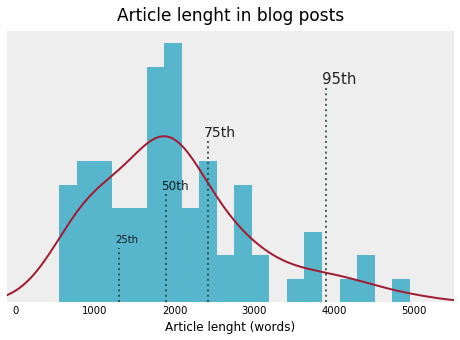

In [26]:
fig, ax = plt.subplots(figsize = (8,5))

#plots
non_outliers["Article lenght (words)"].plot(kind="hist", density=True, alpha=0.65, bins=20, color="#0899BA")
non_outliers["Article lenght (words)"].plot(kind="kde", color="#A11D33")
#quantile lines
q25, q50, q75, q95 = non_outliers["Article lenght (words)"].quantile([0.25, 0.5, 0.75, 0.95])
quantiles = [[q25, 0.8, 0.2], [q50, 0.8, 0.4], [q75, 0.8, 0.6], [q95, 0.8, 0.8]]
for i in quantiles:
    ax.axvline(i[0], alpha=i[1], ymax=i[2], linestyle=":", color="#1B4332")
    
ax.text(q25-50, 0.00016, "25th", size = 10, alpha = 0.85)
ax.text(q50-55, 0.0003, "50th", size = 12, alpha = 0.85)
ax.text(q75-55, 0.00044, "75th", size = 14, alpha = 0.85)
ax.text(q95-50, 0.00058, "95th", size = 15, alpha = 0.85)

#x axis
ax.set_xlabel("Article lenght (words)")
ax.set_xlim(-100,5500)
# #y axis
ax.set_ylim(0,0.00072)
ax.set_yticks([]) #remove y ticks
ax.set_ylabel("")
#overall
ax.grid(False) #removes the grid added by the "bmh" style
ax.set_title("Article lenght in blog posts", size=17, pad=10)
ax.tick_params(left=False, bottom=False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)

plt.savefig("article_len.png", dpi=120, transparent=True)
plt.show()

colores
https://coolors.co/641220-6e1423-85182a-a11d33-a71e34-b21e35-bd1f36-c71f37-da1e37-e01e37

https://coolors.co/3fc1c0-20bac5-00b2ca-04a6c2-0899ba-0f80aa-16679a-1a5b92-1c558e-1d4e89

https://coolors.co/ff4800-ff5400-ff6000-ff6d00-ff7900-ff8500-ff9100-ff9e00-ffaa00-ffb600

https://coolors.co/012a4a-013a63-01497c-014f86-2a6f97-2c7da0-468faf-61a5c2-89c2d9-a9d6e5

https://coolors.co/2d00f7-6a00f4-8900f2-a100f2-b100e8-bc00dd-d100d1-db00b6-e500a4-f20089

https://coolors.co/d8f3dc-b7e4c7-95d5b2-74c69d-52b788-40916c-2d6a4f-1b4332-081c15

In [27]:
table.loc[table["Title"]=="20 formas de invertir dinero y crear tu propia fortuna – guía 2020"]

,Title,Keyword,Kw count,Article lenght (words),Reading time (180w/min),Kw density (%)
47,20 formas de invertir dinero y crear tu propia...,invertir dinero,69,6801,00:37:00,1.0


# - - - - - end of code - - - - - 

In [ ]:
#VERSION 1.0

articles_data = {"Title": [], "Keyword": [], "Kw count": [], "Article lenght (words)" : [], "Reading time (180w/min)" : [],
                "Kw density (%)": []}

for article in articles:
    total_article_lenght = 0
    for tag, text in article.items():
        for snipet in text:
            total_article_lenght += len(snipet.split())
    print("\n total article lenght in words >>>", total_article_lenght)
    
    reading_time = datetime.time(0, int(total_article_lenght / 180))
    print("estimated reading time >>>", reading_time)
            
    
    #1. get <h1> and filter all words that might be a potential keyword
    title = article["h1"][0].lower()
    print("<<<title>>>", title)
    title_words = []
    drop_words = ["el", "la", "los", "las", "al", "en", "un", "uno", "una", "unos", "unas", "para", "con", "por", "de", "a",
                 "mi", "mis", "y", "o"]
    for word in title.split():
        if word in drop_words:
            pass
        else:
            title_words.append(word)
#     print(title_words)
    #2. for every potential keyword filtered from title, look for it on every piece of text extracted from the article
    all_pot_kw_extractions = {}
    for potential_kw in title_words:
#         print("\n ..--POTENTIAL KW--..", potential_kw)
        pot_kw_extractions = []
        for tag, text in article.items():
#             print(tag)
            for snipet in text:
#                 print("<<<snipet>>>", snipet.lower())
                word_extraction = re.findall("([^ ]+ [^ ]+ "+potential_kw+" [^ ]+ [^ ]+)|([^ ]+ "+potential_kw+
                                             " [^ ]+)|("+potential_kw+" [^ ]+ [^ ]+)|([^ ]+ [^ ]+ "+potential_kw+
                                             "$)|([^ ]+ [^ ]+ "+potential_kw+"\b)|([^ ]+ [^ ]+ "+potential_kw+
                                             ",{1})|([^ ]+ [^ ]+ "+potential_kw+"\.{1})|([^ ]+ [^ ]+ "+potential_kw+"\;{1})",snipet.lower())
#                 print("<<<raw extraction>>>", word_extraction)
                if word_extraction == []:
                    pass
                else:
#                     print("extraction sucessful!")
                    for raw_extraction in word_extraction:
                        for extraction in raw_extraction:
                            if extraction == "":
                                pass
                            else: 
                                pot_kw_extractions.append(extraction)
#                                 print("<<<actual extraction>>>", extraction)
#         print("potential keyword >>", potential_kw)
#         print("<<<total kw extractions>>", len(pot_kw_extractions))
#         print("<<<kw extractions>>>", pot_kw_extractions)
        all_pot_kw_extractions[potential_kw] = pot_kw_extractions
#     print("all", all_pot_kw_extractions)
#     print("---------")
    #3.Once we have the extractions for every word filtered from title, let's filter the ONE with the highest number of extractions
    keyword_vol = max([len(extraction) for extraction in all_pot_kw_extractions.values()])
    dropp_words = ["el", "la", "los", "las", "al", "en", "un", "uno", "una", "unos", "unas", "para", "con", "por", "de", "a",
                 "mi", "mis", "y", "o", "tu"]
    words_count = {}
    for keyword, extractions in all_pot_kw_extractions.items():
        if len(extractions) == keyword_vol: #filtering all words to only the one wiht the highest number of extractions
            print("<<<kw most repeated>>>", keyword)
            print(extractions)
    #4.From the extractions of the most repeated keyword, split each extraction, evaluate every word and count again to find
    #"company words" along with the main keyword
            for extraction in extractions:
                for word in extraction.split():
                    if word in dropp_words:
                        pass
                    else:
                        punctuation = [",", ".", ";", ":"]
                        if list(word)[-1] in punctuation:
                            if word[:-1] in words_count:
                                words_count[word[:-1]] += 1
                            else:
                                words_count[word[:-1]] = 1
                        else:
                            if word in words_count:
                                words_count[word] += 1
                            else:
                                words_count[word] = 1
    print("word counts >>>", words_count)
    #5. From all the words counted from the extractions, get all the counts, sort it and filter only the top2 (kw + company
    #word) or if case, top3 (kw + 2 company words)
    top_counts = []
    for word, count in words_count.items():
        top_counts.append(count)
    top_counts.sort(reverse=True)
    print("top counts >>>", top_counts)
    final_kw_components = []
    if top_counts[1] == top_counts[2]:
        top = top_counts[:3]
        for word, count in words_count.items():
            if count in top:
                final_kw_components.append(word)
    else:
        top = top_counts[:2]
        for word, count in words_count.items():
            if count in top:
                final_kw_components.append(word)
    print("final parts >>>", final_kw_components)
    #6. Create combinations of the kw with the company words like kw + cw / cw + kw / kw + cw + cw / cw + kw + cw...
    #and look those combinations in the extractions previosuly got to finally decide which is the KW positioned in the article
    highest_count = max(words_count.values())
    kw_highest_c = list(words_count.keys())[list(words_count.values()).index(highest_count)]
#     print(highest_count)
#     print(kw_highest_c)
#     print(all_pot_kw_extractions[kw_highest_c])
    
    kw_shortlist = {}
    kw_options = []
    if len(final_kw_components) == 2:
        kw_option_one = final_kw_components[0]+" "+final_kw_components[1]
        kw_option_two = final_kw_components[1]+" "+final_kw_components[0]
        kw_options.append(kw_option_one)
        kw_options.append(kw_option_two)
        
    else:
        kw_option_one = final_kw_components[0]+" "+final_kw_components[1]
        kw_option_two = final_kw_components[0]+" "+final_kw_components[2]
        kw_option_three = final_kw_components[1]+" "+final_kw_components[0]
        kw_option_four = final_kw_components[2]+" "+final_kw_components[0]
        kw_option_five = final_kw_components[0]+" "+final_kw_components[1]+" "+final_kw_components[2]
        kw_option_six = final_kw_components[0]+" "+final_kw_components[2]+" "+final_kw_components[1]
        kw_option_seven = final_kw_components[1]+" "+final_kw_components[0]+" "+final_kw_components[2]
        kw_option_eight = final_kw_components[2]+" "+final_kw_components[0]+" "+final_kw_components[1]
        kw_options.append(kw_option_one)
        kw_options.append(kw_option_two)
        kw_options.append(kw_option_three)
        kw_options.append(kw_option_four)
        kw_options.append(kw_option_five)
        kw_options.append(kw_option_six)
        kw_options.append(kw_option_seven)
        kw_options.append(kw_option_eight)
        
    for extraction in all_pot_kw_extractions[kw_highest_c]:
        for kw in kw_options:
#           print(kw)
            if re.findall(kw, extraction):
                if kw in kw_shortlist:
                    kw_shortlist[kw] += 1
#                   print("shortlist>>>",kw_shortlist)
                else:
                    kw_shortlist[kw] = 1
#                   print("shortlist>>>", kw_shortlist)
    print("kw shortlist results >>>", kw_shortlist)
    
    article_kw = list(kw_shortlist.keys())[list(kw_shortlist.values()).index(max(kw_shortlist.values()))]
    kw_counting = max(kw_shortlist.values())
    kw_density = round(kw_counting / total_article_lenght, 3) * 100
#     print("kw density >>>", kw_density)
    
    #7.Add all data to "articles_data" dictionary for further conversion to Dataframe
    articles_data["Title"].append(title)
    articles_data["Keyword"].append(article_kw)
    articles_data["Kw count"].append(kw_counting)
    articles_data["Article lenght (words)"].append(total_article_lenght)
    articles_data["Reading time (180w/min)"].append(reading_time)
    articles_data["Kw density (%)"].append(kw_density)
    

# (beta) article analysis

In [ ]:
meta_kw = []

for word in t1.split():
        if len(word) > 4:
            windex = t1.split().index(word)
            #three words phrase
            if windex-1 < 0:
                wstart = 0
            else:
                wstart = windex-1
            try:
                t1.split()[windex+1]
                wend = windex+2
            except:
                wend = windex+1
            
            three_words = " ".join(t1.split()[wstart:wend])
            meta_kw.append(three_words)
            
            #four words phrase
            if windex-2 < 0:
                wstart = 0
            else:
                wstart = windex-2
            try:
                t1.split()[windex+2]
                wend = windex+3
            except:
                wend = windex+2
            
            four_words = " ".join(t1.split()[wstart:wend])
            meta_kw.append(four_words)

print(meta_kw)

In [ ]:
drop_words = ["el", "la", "los", "las", "en", "un", "una", "por", "para", "con"]
final_kw = []

for kw in meta_kw:
    kw_split = kw.split()
    if kw_split[0] in drop_words:
        del kw_split[0]
    if kw_split[-1] in drop_words:
        del kw_split[-1]
    final_kw.append(" ".join(kw_split))

print(final_kw)
        

In [ ]:
ff_kw = []
for kw in set(final_kw):
    if len(kw.split()) < 2:
        pass
    else:
        ff_kw.append(kw)
print(ff_kw)

In [ ]:
for kw in ff_kw:
    for content in text[1]["title (h1)"]:
        print(re.findall(kw, content.lower()))

In [ ]:
full_article = ""
for key,value in text[1].items():
    for text in value:
        if text == ".":
            pass
        else:
            full_article += text.lower() + " "

In [ ]:
full_article

In [ ]:
stringtest = "una web profesional, creala en 15 pasos, tu web en 15 minutos. Inicialo web ahora."

In [ ]:
go = 0 + 7 + 40 + 29
re.search("web", stringtest[go:])

In [ ]:
stringtest[40:-1]

In [ ]:
stringtest[70:]

In [ ]:
re.search("web", stringtest[70:])

4 - 7, 44 - 47, 73 - 76

In [ ]:
stringlow = stringtest.lower().split()

In [ ]:
stringlow.index("15")

In [ ]:
keyw = ["web", "pasos"]
for kw in keyw:
    for word in stringlow:
        if kw == word:
            print(stringlow.index(kw))

In [ ]:
for word in stringlow:
    print("stringword", word)
    for kw in keyw:
        print("keyword", kw)
        if word == kw:
            print("FOUND", stringlow.index(kw))

In [ ]:
d == None

In [ ]:
word = "web"

all_loc = []
start = 0

while re.search(word, stringtest[start:]):
    kw_obj = re.search(word, stringtest[start:])
    print(kw_obj)
    loc = (kw_obj.start() + start, kw_obj.end() + start)
    all_loc.append(loc)
    print(all_loc)
    start += kw_obj.end()
    print(start)


# try:
#     kw = re.search(word, stringtest)
#     cc = kw.end()
#     print("first", kw.span())
#     try:
#         kww = re.search("web", stringtest[cc:-1])
#         print("second", kww.span())
#     except:
#         pass
# except:
#     pass
    
        
# except:
#     pass

# if kw:
#     cc = kw.end()
#     while cc:
#         re.search(word, stringtest[cc:-1])

In [ ]:
for coor in all_loc:
    if coor[0] - 10 < 0:
        print(stringtest[: coor[1]+10])
    try:
        print(stringtest[coor[0]-10: coor[1]+10])
    except:
        pass

# -----

In [ ]:
stringtest2 = 'web profesional, creala en 15 pasos, tu web en 15 minutos. Inicialo web ahora.'

In [ ]:
stringtest3 = "Tengo mi web."
stringtest4 = "homie Tengo web mi."

In [ ]:
re.findall("[^ ]+ [^ ]+ web", stringtest3)

In [ ]:
d = re.findall('([^ \r\n]+) ([^ \r\n]+) web', stringtest, re.IGNORECASE)
for result in d:
    print(result)

In [ ]:
result = re.findall("([^ ]+ [^ ]+ web [^ ]+ [^ ]+)|([^ ]+ web [^ ]+)|(web [^ ]+ [^ ]+)|([^ ]+[^ ]+ web.?)", stringtest2)
result

In [ ]:
kw = "wob"
result2 = re.findall("([^ ]+ [^ ]+ "+kw+" [^ ]+ [^ ]+)|([^ ]+ "+kw+" [^ ]+)|("+kw+" [^ ]+ [^ ]+)|([^ ]+[^ ]+ "+kw+"web.?)", stringtest2)
result2 == []

In [ ]:
holi["kw"] = result

In [ ]:
holi

In [ ]:
for x in look[0]:
    if x == "":
        pass
    else:
        print("string", x)

In [ ]:
re.findall("([^ ]+ web [^ ]+)|([^ ]+ [^ ]+ web.?)", stringtest4)

In [ ]:
stringx = ["uno keyword", "dos keywords con plus", "tres keywords con un plus extra ultra", ""]

In [ ]:
listt = []
for x in stringx:
    listt.append(len(x.split()))
    print(len(x.split()))

In [ ]:
sum(listt)

In [ ]:
for title in all_posts["title"]:
    print(title)

# - - - - - - 

In [ ]:
post_count = {}
for i, row in all_posts.iterrows():
    if row["date"].year in post_count:
        post_count[row["date"].year] += 1
    else:
        post_count[row["date"].year] = 1

In [ ]:
post_count

In [ ]:
post_count2 = {}
for i, row in all_posts.iterrows():
    if row["date"].year in post_count2:
        post_count2[row["date"].year] = []
        if 
        post_count2[row["date"].year].append({row["date"].month})
    else:
        post_count2[row["date"].year] = 1

In [ ]:
str(all_posts["date"][0].month) + " " + str(all_posts["date"][0].year)

In [ ]:
jaja = all_posts.groupby("date").count()

In [ ]:
jaja.index

In [ ]:
jaja.title

In [ ]:
plt.bar(jaja.index, jaja.title)

### how to substract a part of a string base on index

In [ ]:
phrase = "los 30 mejores pasos de baile para las fiestas"

In [ ]:
ls = phrase.split()

In [ ]:
kw_index = ls.index("pasos")

In [ ]:
kw_index-1

In [ ]:
final_phrase = " ".join(ls[kw_index-1:kw_index+2])

In [ ]:
final_phrase